<h1><b>Assignment #4 - K Means Clustering</b></h1>
Ryan Harris
<p><i>November 2020</i>

<h2><b>Prepare Data for Analysis</b></h2>

<h4><b><u>Load Dependencies</u></b></h4>

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
    

<h4><b><u>Import, Transform and Normalize Data</u></b></h4>

In [2]:
#Import
uni_df = pd.read_csv('Universities.csv')

#Fix Column Names
uni_df.columns = ['cllg_nme','st','pblc_prvt','apps_rcd','apps_accptd','nw_stdnt_enrlld','pct_stdnt_top_10','pct_stdt_top_25','ft_ugrd','pt_ugrd','inst_ttn','oost_ttn','room','board','addl_fees','est_bk_cst','est_prsnl','pct_fac_w_phd','stdnt_fac_ration','grad_rt']

#Remove Rows With Missing Data
uni_df = uni_df.dropna()

#Assign Continuous Columns to Normalize
cols_to_norm = ['apps_rcd','apps_accptd','nw_stdnt_enrlld','pct_stdnt_top_10','pct_stdt_top_25','ft_ugrd','pt_ugrd','inst_ttn','oost_ttn','room','board','addl_fees','est_bk_cst','est_prsnl','pct_fac_w_phd','stdnt_fac_ration','grad_rt']

#Normalize only Coninuous Variables
scaler = preprocessing.StandardScaler()
uni_df[cols_to_norm] = scaler.fit_transform(uni_df[cols_to_norm])

#Verify mean ~0, std ~1
uni_df[cols_to_norm].describe()       

,apps_rcd,apps_accptd,nw_stdnt_enrlld,pct_stdnt_top_10,pct_stdt_top_25,ft_ugrd,pt_ugrd,inst_ttn,oost_ttn,room,board,addl_fees,est_bk_cst,est_prsnl,pct_fac_w_phd,stdnt_fac_ration,grad_rt
count,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02
mean,3.535742e-19,7.307200e-18,3.241097e-17,-1.249296e-17,-5.150398e-17,-1.980016e-17,1.308225e-17,6.882911e-17,2.281732e-16,-7.920062e-17,-2.643557e-16,1.549834e-17,8.367923e-17,8.544710e-17,2.267589e-16,1.178581e-19,-3.601743e-16
std,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00
min,-7.545946e-01,-8.004321e-01,-8.240267e-01,-1.463346e+00,-2.297808e+00,-7.104950e-01,-5.157867e-01,-1.596578e+00,-2.212899e+00,-2.219315e+00,-2.809564e+00,-1.038101e+00,-2.814411e+00,-1.559102e+00,-3.916883e+00,-2.840423e+00,-2.789257e+00
25%,-5.764099e-01,-5.707325e-01,-5.649142e-01,-7.049319e-01,-7.709206e-01,-5.456245e-01,-4.636546e-01,-1.044493e+00,-7.627330e-01,-6.753055e-01,-6.568383e-01,-6.794280e-01,-2.992624e-01,-6.782043e-01,-6.131728e-01,-6.836530e-01,-6.930099e-01
50%,-3.689784e-01,-3.342360e-01,-3.692133e-01,-2.715523e-01,-8.135868e-02,-3.961905e-01,-3.228008e-01,8.190356e-02,-1.103207e-01,-1.840295e-01,-7.053408e-02,-2.785585e-01,-2.992624e-01,-1.643470e-01,1.677043e-01,-1.444606e-01,2.412710e-02
75%,1.756524e-01,1.571491e-01,1.265990e-01,4.326895e-01,6.574576e-01,1.056032e-01,4.633322e-02,6.966813e-01,6.293895e-01,6.202593e-01,5.263660e-01,3.009440e-01,3.141884e-01,4.229184e-01,8.284464e-01,6.386522e-01,7.412641e-01
max,1.104664e+01,9.702574e+00,6.134837e+00,3.683036e+00,2.184345e+00,6.020252e+00,1.362464e+01,1.940390e+00,2.211431e+00,3.642308e+00,4.272002e+00,8.067966e+00,1.098823e+01,8.057369e+00,1.789526e+00,3.809617e+00,2.892675e+00


<h2><b>k Means</b></h2>

<h4><b><u>Find Optimal k Using Elbow Method</u></b></h4>

'The optimal k is 3'

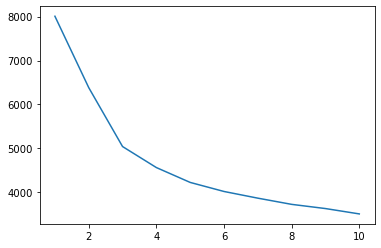

In [3]:
#Get SSE
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 6011,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(uni_df.iloc[:,3:20])
    sse.append(kmeans.inertia_)

#Plot for Visual
plt.plot(range(1,11),sse)

#Use KneeLocator to confirm
kl = KneeLocator(
        range(1,11), sse, curve ="convex", direction="decreasing")
str("The optimal k is ") + str(kl.elbow)

<h4><b><u>Run k Means using Optimal k to Generate Clusters</u></b></h4>

In [4]:
#Set parameters for kmeans using kl.elbow value from above
kmeans = KMeans(
    init="random",
    n_clusters=kl.elbow,
    n_init=10,
    max_iter=300,
    random_state=6011
)
kmeans.fit(uni_df.iloc[:,3:20])

#Assign clusters to dataframe and verify
uni_df['cluster'] = kmeans.labels_
uni_df[['cllg_nme','cluster']].head(25)

,cllg_nme,cluster
0,Alaska Pacific University,1
2,University of Alaska Southeast,1
9,Birmingham-Southern College,2
11,Huntingdon College,1
21,Talladega College,1
25,University of Alabama at Birmingham,1
31,Arkansas College (Lyon College),1
37,Hendrix College,1
38,John Brown University,1
45,Harding University,1
